<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Charles/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [68]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [69]:
dogecoin = 'DOGE'
currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{dogecoin}-{currency}", "yahoo", start, end)

In [70]:
data.index = pd.to_datetime(data.index)

In [71]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,0.000156,0.000150,0.000150,0.000154,1.052240e+05,0.000154
2016-01-02,0.000156,0.000148,0.000155,0.000151,9.047700e+04,0.000151
2016-01-03,0.000150,0.000143,0.000149,0.000146,1.040050e+05,0.000146
2016-01-04,0.000148,0.000142,0.000146,0.000144,9.216000e+04,0.000144
2016-01-05,0.000154,0.000135,0.000144,0.000137,5.293700e+04,0.000137
...,...,...,...,...,...,...
2021-06-25,0.255127,0.230972,0.237673,0.244784,2.649457e+09,0.244784
2021-06-26,0.266891,0.240894,0.246045,0.264450,2.167522e+09,0.264450
2021-06-27,0.266982,0.250762,0.264918,0.256857,1.932995e+09,0.256857


In [72]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [73]:
pred_days = 30

In [74]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [75]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [76]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
62/62 [==============================] - 8s 46ms/step - loss: 0.0034
Epoch 2/30
62/62 [==============================] - 3s 46ms/step - loss: 0.0016
Epoch 3/30
62/62 [==============================] - 3s 46ms/step - loss: 0.0015
Epoch 4/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0011
Epoch 5/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0013
Epoch 6/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0012
Epoch 7/30
62/62 [==============================] - 3s 47ms/step - loss: 9.8937e-04
Epoch 8/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0011
Epoch 9/30
62/62 [==============================] - 3s 49ms/step - loss: 8.8693e-04
Epoch 10/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0012
Epoch 11/30
62/62 [==============================] - 3s 48ms/step - loss: 9.0219e-04
Epoch 12/30
62/62 [==============================] - 3s 48ms/step - loss: 0.0010
Epoch 13/30
62/62 [======

In [77]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{dogecoin}-{currency}", "yahoo", test_start, test_end)

In [78]:
test_data.index = pd.to_datetime(test_data.index)

In [79]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,0.005685,0.004615,0.004681,0.005685,228961515,0.005685
2021-01-02,0.013698,0.005584,0.005686,0.010615,3421562680,0.010615
2021-01-03,0.013867,0.009409,0.010602,0.009771,2707003608,0.009771
2021-01-04,0.011421,0.007878,0.009785,0.009767,1372398979,0.009767
2021-01-05,0.010219,0.008972,0.009767,0.009920,687256067,0.009920
...,...,...,...,...,...,...
2021-06-25,0.255127,0.230972,0.237673,0.244784,2649457302,0.244784
2021-06-26,0.266891,0.240894,0.246045,0.264450,2167521670,0.264450
2021-06-27,0.266982,0.250762,0.264918,0.256857,1932994784,0.256857


In [80]:
actual_prices = test_data['Close']

In [81]:
actual_prices = np.array(actual_prices)
actual_prices

array([0.005685  , 0.010615  , 0.009771  , 0.009767  , 0.00992   ,
       0.010465  , 0.009742  , 0.009846  , 0.010194  , 0.00986   ,
       0.008835  , 0.008063  , 0.008616  , 0.009397  , 0.009369  ,
       0.009265  , 0.009067  , 0.009171  , 0.009098  , 0.00906   ,
       0.008166  , 0.008524  , 0.008579  , 0.008727  , 0.008383  ,
       0.008255  , 0.007482  , 0.012555  , 0.047162  , 0.028176  ,
       0.037196  , 0.034875  , 0.03152   , 0.03712   , 0.053289  ,
       0.046935  , 0.057595  , 0.078782  , 0.078825  , 0.07007   ,
       0.072896  , 0.069676  , 0.070069  , 0.06645   , 0.062537  ,
       0.056591  , 0.05352   , 0.049376  , 0.059541  , 0.055139  ,
       0.054384  , 0.05598   , 0.053725  , 0.047392  , 0.056555  ,
       0.050167  , 0.05048   , 0.050083  , 0.048052  , 0.050599  ,
       0.050262  , 0.050592  , 0.050048  , 0.049609  , 0.050984  ,
       0.052122  , 0.061949  , 0.057998  , 0.056004  , 0.055918  ,
       0.055349  , 0.062432  , 0.058592  , 0.057088  , 0.05860

In [82]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [83]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2004.000000,2004.000000,2004.000000,2004.000000,2.004000e+03,2004.000000
mean,0.019724,0.016263,0.017974,0.018099,5.862097e+08,0.018099
std,0.079428,0.063474,0.071476,0.071742,3.271861e+09,0.071742
min,0.000138,0.000134,0.000134,0.000135,4.147700e+04,0.000135
25%,0.001031,0.000853,0.000928,0.000952,2.514592e+06,0.000952
50%,0.002542,0.002399,0.002484,0.002483,1.877418e+07,0.002483
75%,0.003496,0.003224,0.003368,0.003375,7.625401e+07,0.003375
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,0.684777


In [84]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [85]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [86]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [87]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

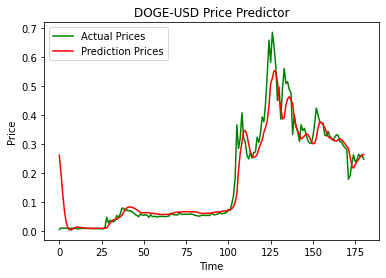

In [88]:
plt.plot(actual_prices, color='green', label='Actual Prices')
plt.plot(prediction_prices, color='red', label='Prediction Prices')
plt.title(f"{dogecoin}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()